In [4]:
from transformers import pipeline
model_path = "daveni/twitter-xlm-roberta-emotion-es"
emotion_analysis = pipeline("text-classification", framework="pt", model=model_path, tokenizer=model_path)
emotion_analysis("Esta seleccion es una gran putisima mierda la verdad")


[{'label': 'anger', 'score': 0.766781210899353}]

1) alegría
2) tristeza
3) otros
4) ira
5) sorpresa
6) asco
7) miedo

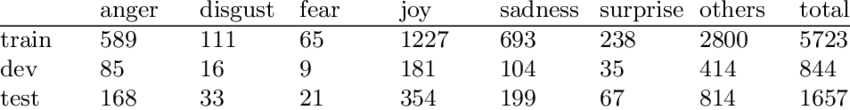

"Tengo mucho miedo de lo que pueda pasar mañana en la operación... 😰" miedo

"¡Hoy es un día maravilloso! El sol brilla y todo está saliendo perfecto 😊🌞" Alegria

"Siento un vacío enorme, nada parece mejorar... 😢" Tristeza

"Acabo de terminar de leer un libro muy interesante sobre historia antigua." Otros

"Esta puta seleccion de mierda" Ira

"¡No puedo creer que haya ganado el sorteo! 😲 ¡Qué sorpresa tan increíble!" Sorpresa

"Me da asco los vegetales 🤢" Asco

In [45]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)
model_path = "daveni/twitter-xlm-roberta-emotion-es"
tokenizer = AutoTokenizer.from_pretrained(model_path )
config = AutoConfig.from_pretrained(model_path )
# PT
model = AutoModelForSequenceClassification.from_pretrained(model_path )
text = "Me da asco los vegetales, realmente mucho asco"
text = preprocess(text)
print(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
# Print labels and scores
ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = config.id2label[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")


Me da asco los vegetales, realmente mucho asco
1) anger 0.4048
2) disgust 0.1887
3) sadness 0.1434
4) fear 0.096
5) others 0.0692
6) surprise 0.0657
7) joy 0.0322
